In [1]:
import xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

sns.set_style('darkgrid')

In [3]:
directory = r'C:\Users\Jean\Documents\JupyterLab\fetal_health.csv'

In [4]:
data = pd.read_csv(directory)

data.shape

(2126, 22)

In [5]:
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

C:\Users\Jean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

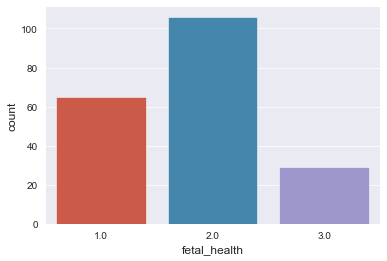

In [7]:
sns.countplot(data['fetal_health'].iloc[300:500])

In [8]:
data_test = data[300:500]

data_test.shape

(200, 22)

In [9]:
frame = [data[:300], data[500:]]


data_train = pd.concat(frame, axis=0)

data_train.shape

(1926, 22)

In [10]:
data_train.drop_duplicates(inplace=True)

In [11]:
data_train.shape

(1916, 22)

C:\Users\Jean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

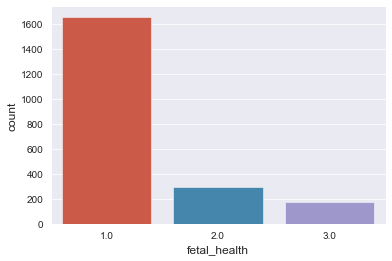

In [12]:
sns.countplot(data['fetal_health'])

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1916 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1916 non-null   float64
 1   accelerations                                           1916 non-null   float64
 2   fetal_movement                                          1916 non-null   float64
 3   uterine_contractions                                    1916 non-null   float64
 4   light_decelerations                                     1916 non-null   float64
 5   severe_decelerations                                    1916 non-null   float64
 6   prolongued_decelerations                                1916 non-null   float64
 7   abnormal_short_term_variability                         1916 non-null   float64
 8   mean_value_of_short_term_variability  

In [14]:
data_train.iloc[0,:10], data_train.iloc[0,10:]

(baseline value                                            120.0
 accelerations                                               0.0
 fetal_movement                                              0.0
 uterine_contractions                                        0.0
 light_decelerations                                         0.0
 severe_decelerations                                        0.0
 prolongued_decelerations                                    0.0
 abnormal_short_term_variability                            73.0
 mean_value_of_short_term_variability                        0.5
 percentage_of_time_with_abnormal_long_term_variability     43.0
 Name: 0, dtype: float64,
 mean_value_of_long_term_variability      2.4
 histogram_width                         64.0
 histogram_min                           62.0
 histogram_max                          126.0
 histogram_number_of_peaks                2.0
 histogram_number_of_zeroes               0.0
 histogram_mode                         120.0
 h

In [15]:
data_train.shape

(1916, 22)

<AxesSubplot:>

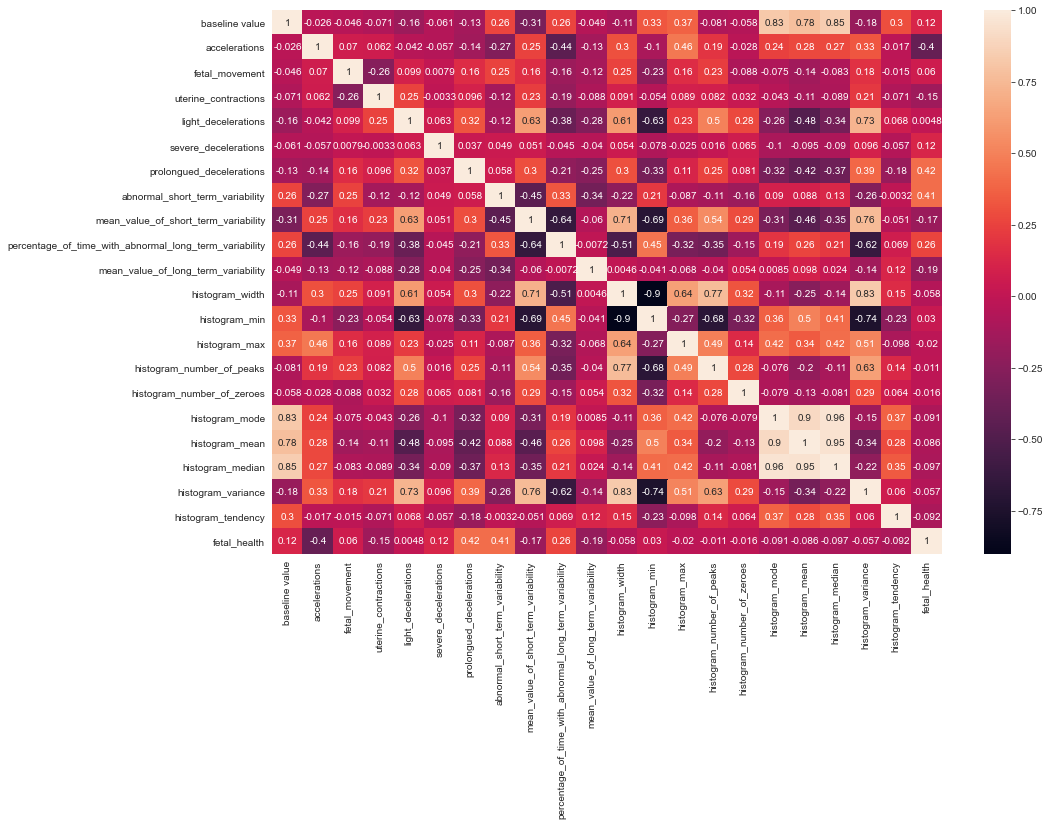

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data_train.corr('spearman'), annot=True)

In [17]:
from sklearn.decomposition import PCA


In [18]:
pca = PCA(n_components=2)

comp = pca.fit_transform(data_train.iloc[:,:-1])

In [19]:
data_train.iloc[:,:-1]

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_width  histogram_min  histogram_max  \
0                64.0           62.0          126.0   
1               130.0           68.0          198.0   
2               130.0           68.0          198.0   
3               117.0           53.0          170.0   
4               117.0           53.0          170.0   
...               ...            ...            

In [20]:
dic_pca = {'comp1':comp[:,0], 'comp2':comp[:,1], 'target':np.array(data_train['fetal_health'].values)}

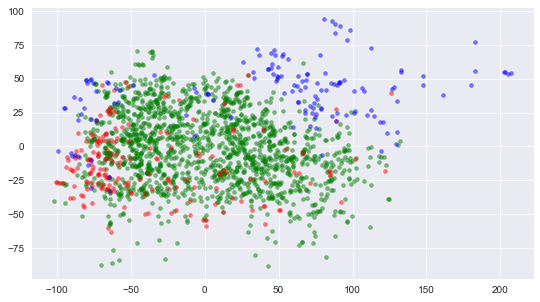

In [21]:
data_pca = pd.DataFrame(dic_pca)

plt.figure(figsize=(9,5))

plt.scatter(data_pca[data_pca['target'] == 1.0]['comp1'], data_pca[data_pca['target'] == 1.0]['comp2'], c='green', alpha=0.5, s=15)
plt.scatter(data_pca[data_pca['target'] == 2.0]['comp1'], data_pca[data_pca['target'] == 2.0]['comp2'], c='red', alpha=0.5, s=15)
plt.scatter(data_pca[data_pca['target'] == 3.0]['comp1'], data_pca[data_pca['target'] == 3.0]['comp2'], c='blue', alpha=0.5, s=15)

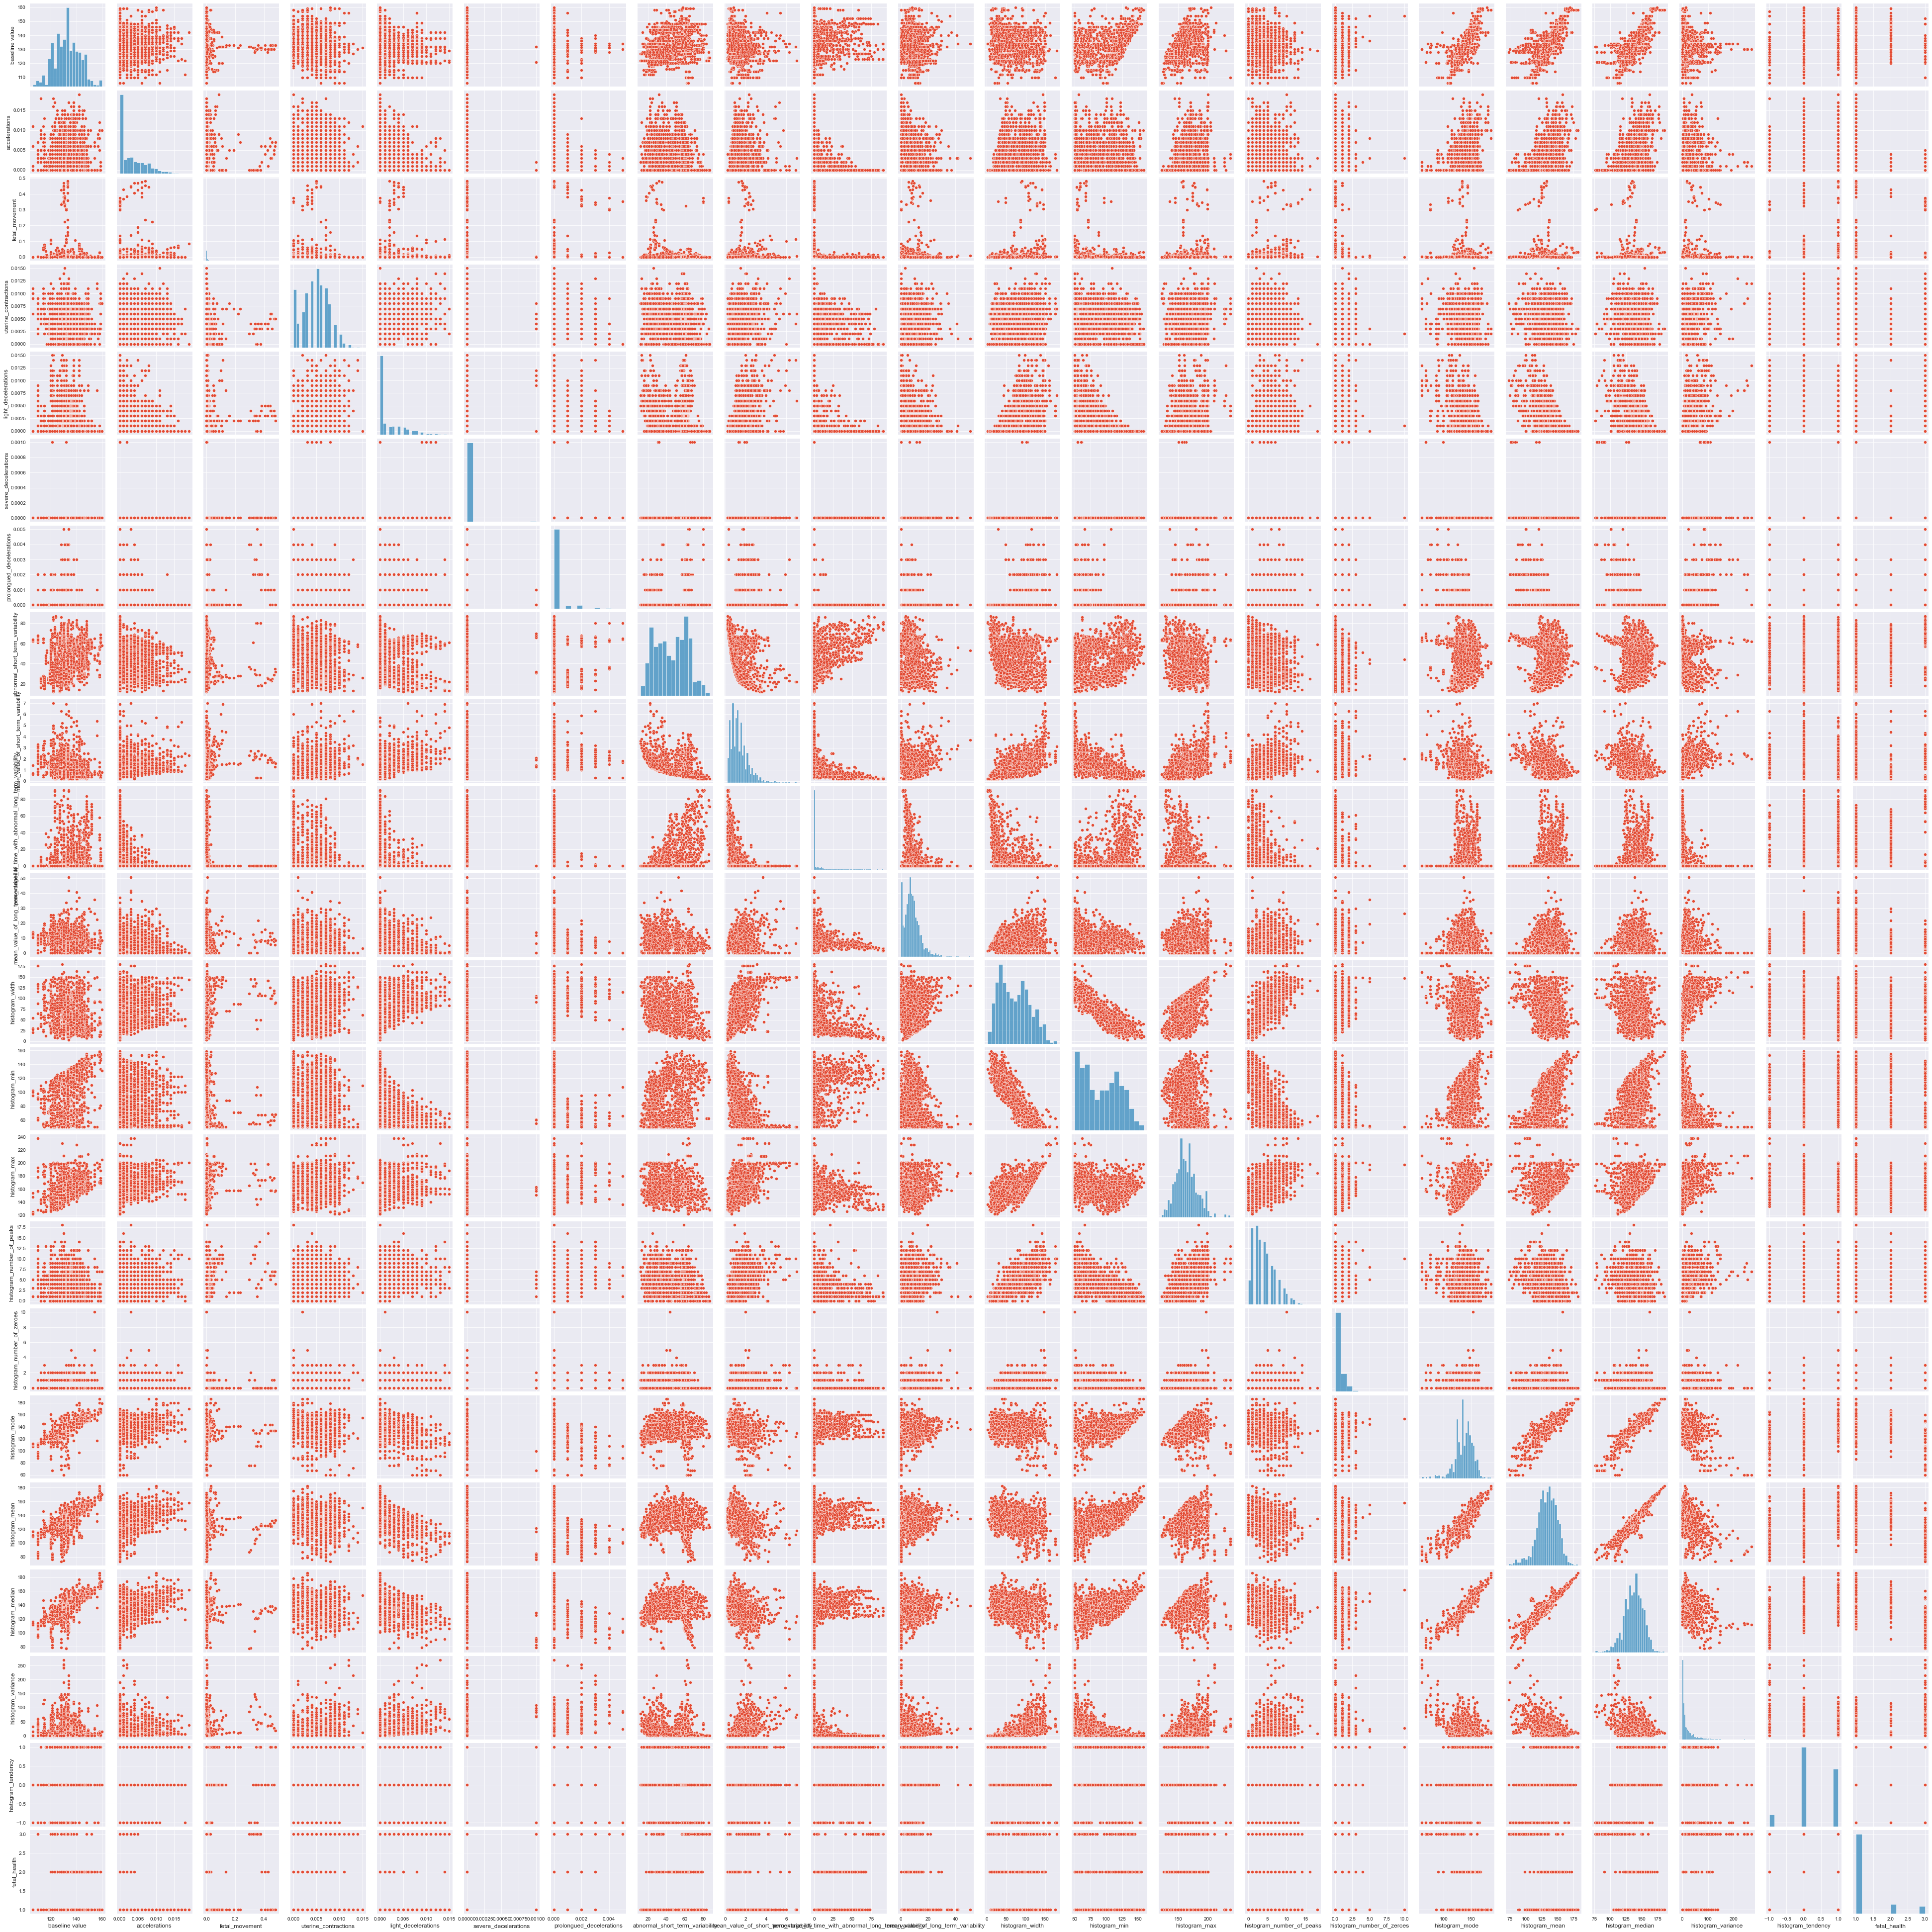

In [22]:
sns.pairplot(data_train)

<AxesSubplot:xlabel='fetal_health', ylabel='baseline value'>

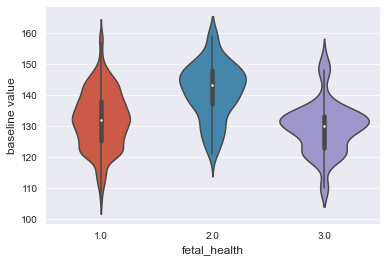

In [23]:
sns.violinplot(x=data_train['fetal_health'], y=data_train['baseline value'])

C:\Users\Jean\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='baseline value', ylabel='Density'>

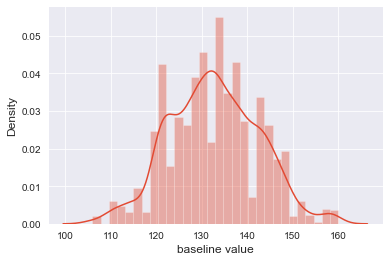

In [24]:
sns.distplot(data_train['baseline value'], bins=30)

C:\Users\Jean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='baseline value'>

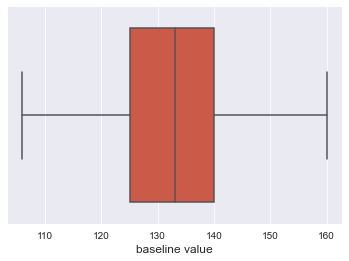

In [25]:
sns.boxplot(data_train['baseline value'])

C:\Users\Jean\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='accelerations', ylabel='Density'>

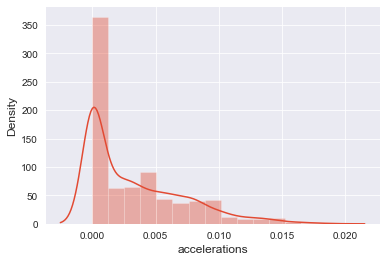

In [26]:
sns.distplot(data_train['accelerations'], bins=15)

<AxesSubplot:xlabel='fetal_health', ylabel='accelerations'>

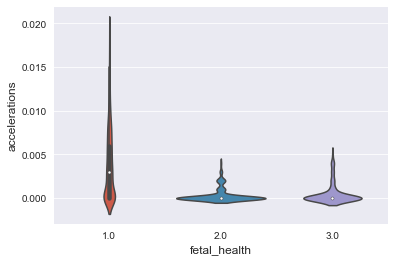

In [27]:
sns.violinplot(x=data_train['fetal_health'], y=data_train['accelerations'])

C:\Users\Jean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='accelerations'>

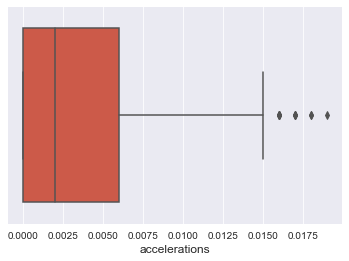

In [28]:
sns.boxplot(data_train['accelerations'])

C:\Users\Jean\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fetal_movement'>

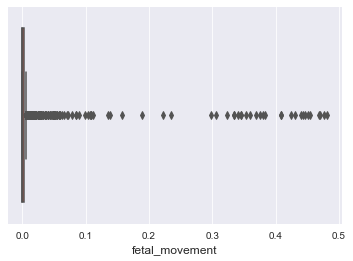

In [29]:
sns.boxplot(data_train['fetal_movement'])

C:\Users\Jean\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fetal_movement', ylabel='Density'>

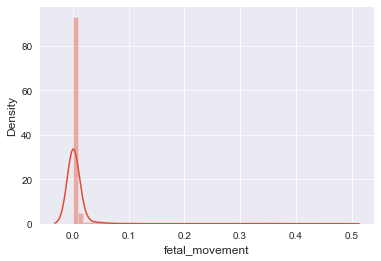

In [30]:
sns.distplot(data_train['fetal_movement'])

<AxesSubplot:xlabel='fetal_health', ylabel='fetal_movement'>

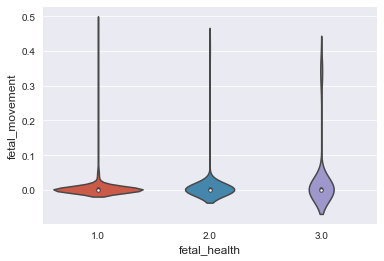

In [31]:
sns.violinplot(x=data_train['fetal_health'], y=data_train['fetal_movement'])

C:\Users\Jean\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jean\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jean\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='fetal_health', ylabel='fetal_movement'>

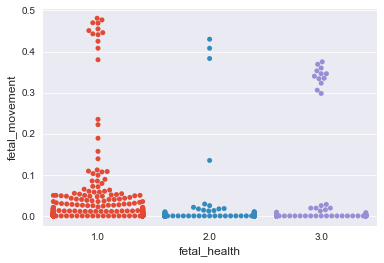

In [32]:
sns.swarmplot(x=data_train['fetal_health'], y=data_train['fetal_movement'])

In [33]:
data_train.iloc[0,:10], data_train.iloc[0,10:]

(baseline value                                            120.0
 accelerations                                               0.0
 fetal_movement                                              0.0
 uterine_contractions                                        0.0
 light_decelerations                                         0.0
 severe_decelerations                                        0.0
 prolongued_decelerations                                    0.0
 abnormal_short_term_variability                            73.0
 mean_value_of_short_term_variability                        0.5
 percentage_of_time_with_abnormal_long_term_variability     43.0
 Name: 0, dtype: float64,
 mean_value_of_long_term_variability      2.4
 histogram_width                         64.0
 histogram_min                           62.0
 histogram_max                          126.0
 histogram_number_of_peaks                2.0
 histogram_number_of_zeroes               0.0
 histogram_mode                         120.0
 h

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train = data_train.iloc[:1800,:-1]
y_train = data_train['fetal_health'][:1800]

scaler.fit(X_train)

X_val = data_train.iloc[1800:,:-1]
y_val = data_train.iloc[1800:, -1]

X_test = data_test.iloc[:,:-1]
y_test = data_test['fetal_health']

In [35]:
# _______________________________________________MY_MODEL
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [36]:
smote = SMOTE(sampling_strategy='not majority', k_neighbors=3).fit(X_train, y_train)

In [37]:
val_X, val_y = smote.fit_resample(X_val, y_val)

In [38]:
val_X.shape, val_y.shape

((285, 21), (285,))

In [39]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)

X_smote = pd.DataFrame(X_smote)
X_smote.columns = X_train.columns

y_smote = pd.DataFrame(y_smote)
y_smote.columns = ['target']

In [40]:
model = XGBClassifier(booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=0.7, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain',
              learning_rate=0.06, max_delta_step=0.9, max_depth=7,
              min_child_weight=0.8,
              n_estimators=300, n_jobs=4, num_class=3, num_parallel_tree=1, objetive='multi:softmax',
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=None,
              subsample=0.8, tree_method='approx',
              verbosity=0, grow_policy='lossguide', feature_selector='greedy')

model.fit(X_smote, y_smote, early_stopping_rounds=10, eval_metric='merror', eval_set=[(val_X, val_y)])

[0]	validation_0-merror:0.45614
[1]	validation_0-merror:0.25965
[2]	validation_0-merror:0.21404


C:\Users\Jean\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jean\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[3]	validation_0-merror:0.18246
[4]	validation_0-merror:0.21754
[5]	validation_0-merror:0.21754
[6]	validation_0-merror:0.21404
[7]	validation_0-merror:0.20702
[8]	validation_0-merror:0.23860
[9]	validation_0-merror:0.20702
[10]	validation_0-merror:0.20702
[11]	validation_0-merror:0.20000
[12]	validation_0-merror:0.20000


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=0.7, colsample_bytree=1,
              feature_selector='greedy', gamma=0.3, gpu_id=-1,
              grow_policy='lossguide', importance_type='gain',
              interaction_constraints='', learning_rate=0.06,
              max_delta_step=0.9, max_depth=7, min_child_weight=0.8,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=4, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', objetive='multi:softmax',
              random_state=0, reg_alpha=0, reg_lambda=0.1,
              scale_pos_weight=None, subsample=0.8, tree_method='approx',
              validate_parameters=1, ...)

In [41]:
pred = model.predict(X_test)

accuracy_score(y_test, pred)

C:\Users\Jean\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.86

In [42]:
accuracy_score(model.predict(X_smote), y_smote)

C:\Users\Jean\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9719605204127412

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
def heatmap(test, pred):
    
    model_cm = confusion_matrix(test, pred)
    print('\t\tReport')
    print(classification_report(test, pred))
    sns.heatmap(model_cm, annot=True, cmap='Blues')

In [45]:
y_test.shape, pred.shape

((200,), (200,))

		Report
              precision    recall  f1-score   support

         1.0       0.85      0.89      0.87        65
         2.0       0.91      0.81      0.86       106
         3.0       0.74      0.97      0.84        29

    accuracy                           0.86       200
   macro avg       0.83      0.89      0.86       200
weighted avg       0.87      0.86      0.86       200



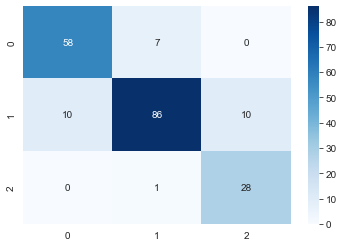

In [46]:
heatmap(y_test, pred)

C:\Users\Jean\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


		Report
              precision    recall  f1-score   support

         1.0       1.00      0.45      0.62        95
         2.0       0.14      1.00      0.24         5
         3.0       0.43      1.00      0.60        16

    accuracy                           0.55       116
   macro avg       0.52      0.82      0.49       116
weighted avg       0.88      0.55      0.60       116



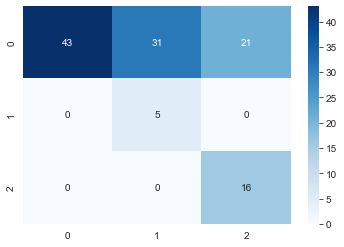

In [47]:
heatmap(y_val, model.predict(X_val))

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
data

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

In [50]:
cross_val_score(model, data.iloc[:,:-1], data.iloc[:,-1], scoring='accuracy', cv=5, verbose=0)

C:\Users\Jean\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jean\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Jean\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y

array([0.89906103, 0.92470588, 0.93176471, 0.88235294, 0.66352941])

In [51]:
'''
train 300 a 500
test 1800:
train resto
'''

'\ntrain 300 a 500\ntest 1800:\ntrain resto\n'

In [56]:
X_train.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [58]:
X_train.iloc[:,10:]

mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                     2.4             64.0           62.0   
1                                    10.4            130.0           68.0   
2                                    13.4            130.0           68.0   
3                                    23.0            117.0           53.0   
4                                    19.9            117.0           53.0   
...                                   ...              ...            ...   
2005                                  7.5             96.0           68.0   
2006                                  6.9             96.0           68.0   
2007                                  0.8            100.0           64.0   
2008                                  4.1            100.0           64.0   
2009                                  5.5             76.0           64.0   

      histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0             126.0                        2.0                         0.0   
1             198.0                        6.0                         1.0   
2             198.0                        5.0                         1.0   
3             170.0                       11.0                         0.0   
4             170.0                        9.0                         0.0   
...             ...                        ...                         ...   
2005          164.0                        6.0                         1.0   
2006          164.0                        5.0                         1.0   
2007          164.0                        8.0                         1.0   
2008          164.0                        5.0                         2.0   
2009          140.0                        5.0                         1.0   

      histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0              120.0           137.0             121.0                73.0   
1              141.0           136.0             140.0                12.0   
2              141.0           135.0             138.0                13.0   
3              137.0           134.0             137.0                13.0   
4              137.0           136.0             138.0                11.0   
...              ...             ...               ...                 ...   
2005           110.0           120.0             120.0                34.0   
2006           110.0           118.0             119.0                30.0   
2007           114.0           114.0             117.0                15.0   
2008           116.0           114.0             117.0                13.0   
2009           116.0           111.0             115.0                 9.0   

      histogram_tendency  
0                    1.0  
1                    0.0  
2                    0.0  
3                    1.0  
4                    1.0  
...                  ...  
2005                 0.0  
2006                 0.0  
2007                 0.0  
2008                 0.0  
2009                 1.0  

[1800 rows x 11 columns]